# Building Neural Network

## Binary Classification

In [2]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow.keras.datasets import imdb # Movie review classification

In [3]:
# Load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# Dataset information
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (25000,)
Test data shape: (25000,)


In [4]:
# Data preview
print(f"First data: {train_data[0]}\n")
print(f"First label: {train_labels[0]}")

First data: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

First label: 1


In [5]:
# Double check if the words are the top 10000
max([max(sequence) for sequence in train_data])

9999

In [6]:
# Change numbers back to words
word_index = imdb.get_word_index()

In [7]:
# See how the dict are made
for i in word_index.items():
    print(i)
    break

('fawn', 34701)


In [8]:
# Change the key-value order
reverse_word_index = {value: key for key, value in word_index.items()}

In [9]:
# See how the dict are made
for i in reverse_word_index.items():
    print(i)
    break

(34701, 'fawn')


In [10]:
reverse_word_index.get(34701 - 3, '?')

'footwork'

In [11]:
# Reverse the first data preview
decoded_first = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # Since the dataset keep 0, 1, 2 for specific purpose, so i - 3 is needed to get the corresponding word
print(f"First data: {decoded_first}\n")
print(f"First label: {train_labels[0]}")

First data: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done d

### Data preparation

In [12]:
for idx, item in enumerate(train_data):
    if idx == 10:
        break
    print(f"Review {idx} - length {len(item)}")

Review 0 - length 218
Review 1 - length 189
Review 2 - length 141
Review 3 - length 550
Review 4 - length 147
Review 5 - length 43
Review 6 - length 123
Review 7 - length 562
Review 8 - length 233
Review 9 - length 130


In [14]:
# Since each review is in different length, we need to make them the same length 
# so that the neural network is able to handle the input dataset

# Apply one-hot encoding to the dataset
def verctorize_sequence(sequences, dimension=10000):
    # Zeros vectors
    results = np.zeros((len(sequences), dimension))
    # Set corresponding word as 1 if the sequence has it
    for idx, sequence in enumerate(sequences):
        results[idx, sequence] = 1.
    return results

x_train = verctorize_sequence(train_data)
x_test = verctorize_sequence(test_data)
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (25000, 10000)
Test data shape: (25000, 10000)


In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
# Check again
for idx, item in enumerate(x_train):
    if idx == 10:
        break
    print(f"Review {idx} - length {len(item)}")

Review 0 - length 10000
Review 1 - length 10000
Review 2 - length 10000
Review 3 - length 10000
Review 4 - length 10000
Review 5 - length 10000
Review 6 - length 10000
Review 7 - length 10000
Review 8 - length 10000
Review 9 - length 10000


In [18]:
# Transform the labels as vectors
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Model Training

#### Define the model

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
# Model structure
model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [25]:
# Compile the model
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

#### Training

In [26]:
# Spilt the validation set
val_num = 10000
x_val = x_train[:val_num]
partial_x_train = x_train[val_num:]
y_val = y_train[:val_num]
partial_y_train = y_train[val_num:]

In [27]:
# Training
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/20


2023-11-25 08:51:35.397809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.4961 - accuracy: 0.7877

2023-11-25 08:51:37.464748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 57ms/step - loss: 0.4961 - accuracy: 0.7877 - val_loss: 0.4096 - val_accuracy: 0.8269
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3049 - accuracy: 0.8995 - val_loss: 0.3101 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2285 - accuracy: 0.9257 - val_loss: 0.3074 - val_accuracy: 0.8742
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1789 - accuracy: 0.9421 - val_loss: 0.2755 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1487 - accuracy: 0.9550 - val_loss: 0.2908 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1228 - accuracy: 0.9623 - val_loss: 0.2979 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1016 - accuracy: 0.9719 - val_loss: 0.3896 - val_accuracy: 0.8641
Epoch 8/20
30/30 [======

#### Evaluation

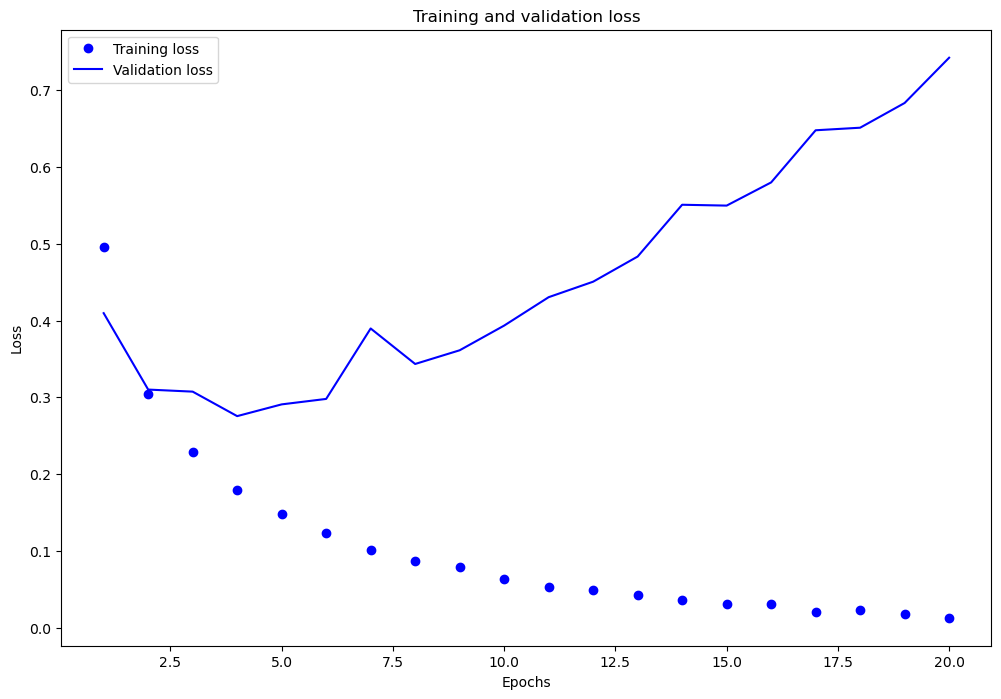

In [28]:
history_dict = history.history

# Get loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
# Plot
epochs = [i+1 for i in range(20)] # X label
fix, ax = plt.subplots(figsize = (12, 8))
ax.plot(epochs, loss_values, 'bo', label = 'Training loss')
ax.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();
